In [198]:
# Importing required Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import random
import math

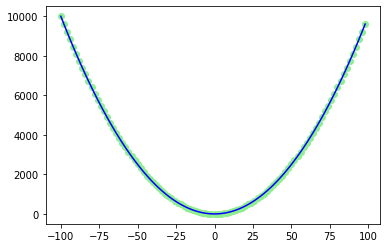

In [203]:
# Creating Dataset

# Function used -->> y = x*x

x_coordinate = np.arange(-100,100,2)
y_coordinate = [x*x for x in x_coordinate]

plt.scatter(x_coordinate, y_coordinate, c ='LightGreen', label = 'Data points')
plt.plot(x_coordinate, y_coordinate, 'b', label = 'Curve Fitted')
plt.show()

random.shuffle(x_coordinate)
X = x_coordinate
random.shuffle(y_coordinate)
Y = y_coordinate

points = 100


In [204]:
# Splitting the dataset for Train and Test

X_train, X_test, Y_train, Y_test = tts( X, Y, test_size = 0.3, random_state = 100)

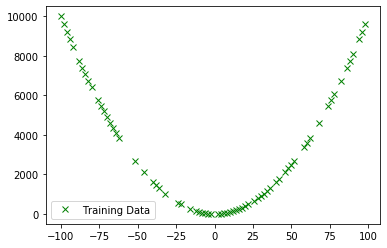

In [189]:
plt.plot(X_train, Y_train, 'gx', label = 'Training Data')
plt.legend()
plt.show()

In [190]:
# Variable Initialization

generalization_factor = 20
association_value = 35
weights = np.ones((35,1))
learning_rate = 1

In [191]:
index1 = 0
index2 = 0

weight1 = []
weight2 = []

In [192]:
def weightCalc(indexval, generalization_factor):
    weights = []
    gf = (generalization_factor//2)
    for i in range(indexval - gf, indexval + gf +1):
        weights.append(i)
    return weights

In [193]:
def weightIndx(i, generalization_factor, association_value, points):
    i = int(i)
    asindx = generalization_factor//2 + ((association_value - 2*(generalization_factor//2))*i)/points
    return math.floor(asindx)                                      

In [194]:
def meanSquare(weights, ovr_weight, X, Y):
    meansqr = 0
    for i in range(0,len(ovr_weight)):
        summation_ovr = 0
        for j in ovr_weight[i]:
            summation_ovr = summation_ovr + weights[j]
        meansqr = meansqr + (summation_ovr - Y_train[i])**2
    return meansqr

def Result(weights,ovr_weight):
    output = []
    for i in range(0,len(ovr_weight)):
        summation_ovr = 0
        for j in ovr_weight[i]:
            summation_ovr = summation_ovr + weights[j]
        output.append(summation_ovr)
    return output

In [195]:
for indexval in X_train:
    index1 = weightIndx(indexval, generalization_factor , association_value, points)
    weight1.append(weightCalc(index1, generalization_factor))

for ix in X_test:
    index2 = (weightIndx(ix, generalization_factor , association_value, points))
    weight2.append(weightCalc(index2, generalization_factor))
    

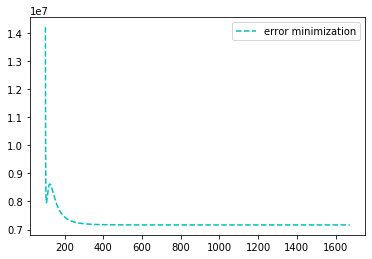

In [196]:
err_list = []
err_plot = []

oldError = 0
presentError = 10
repetitions = 100
error_threshold = 0.0002

while repetitions > 0 and abs(oldError - presentError) > error_threshold:
    oldError = presentError
    for i in range(0,len(weight1)):
        summation_ovr = 0
        for j in weight1[i]:
            summation_ovr = summation_ovr + weights[j]
        error = summation_ovr - Y_train[i]
        solution  = error/generalization_factor
        for k in weight1[i]:
            weights[k] = weights[k] - learning_rate*solution
    presentError = float(meanSquare(weights,weight1,X_train,Y_train))
    err_list.append(presentError)
    repetitions = repetitions + 1
    err_plot.append(repetitions)

plt.figure(2)
plt.plot(np.asarray(err_plot), np.asarray(err_list), 'c--',label = 'error minimization')
plt.legend()
plt.show()

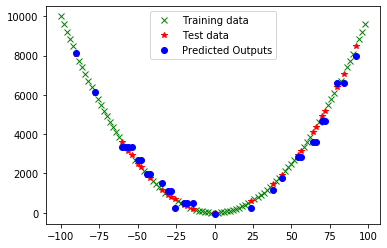

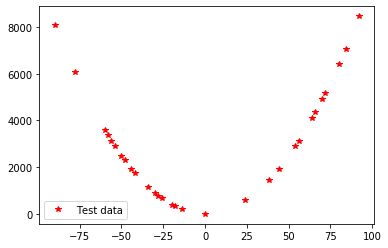

In [197]:
#Testing procedure

output = Result(weights, weight2)
Accuracy =float(meanSquare(weights,weight2,X_test,Y_test))

plt.figure(3)
plt.plot(X_train,Y_train,'gx',label = 'Training data')
plt.plot(X_test,Y_test,'r*',label = 'Test data')
plt.plot(X_test,np.asarray(output),'bo', label = 'Predicted Outputs')
plt.legend()
plt.show()

plt.plot(X_test,Y_test,'r*',label = 'Test data')
plt.legend()
plt.show()